This tutorial explains simple linear regression. While it was originally done using a spreadsheet (as shown in the link below), we will implement it using the NumPy and matplotlib libraries.

https://machinelearningmastery.com/simple-linear-regression-tutorial-for-machine-learning/


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data set
The data set we are using is completely made up. Below is the raw data.
The attribute x is the input variable and y is the output variable that we are trying to
predict.

In [2]:
x = np.array([1, 2, 4, 3, 5])
y = np.array([1, 3, 3, 2, 5])

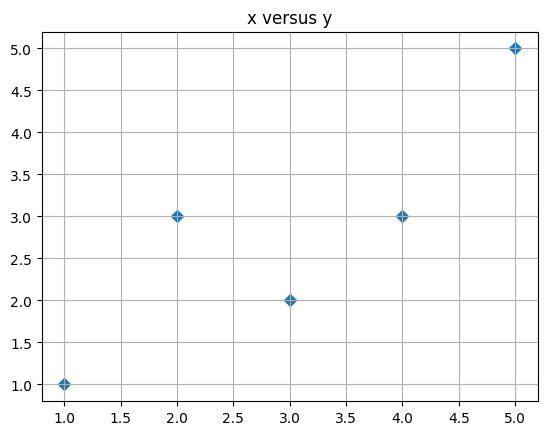

In [4]:
plt.scatter(x, y,marker='D', label='y')
plt.title('x versus y')
# plt.legend()
plt.grid(True)
plt.show()

# Simple Linear Regression

*   Simple Linear Regression: sed when there's a single input attribute ($x$) to predict an output ($y$).

*   Model Equation: $y = \beta_0 + \beta_1x$.

$\beta_0$ : the intercept (or bias) determining where the line crosses the y-axis.

$\beta_1$ : the slope, indicating how changes in x affect y.

*   Objective: The goal is to estimate $\beta_0$ and $\beta_1$ to minimize prediction errors

*   Coefficient Estimation:

$\beta_1$:calculated using the covariance of $x$ and $y$ over the variance of $x$.

$\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$

$\beta_0$:calculated using the covariance of $x$ $y$ and $\beta_1$.

$\beta_0 = \bar{y} - \beta_1\bar{x}$

**Estimating the slope $\beta_1$**

$\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$

In [5]:
mean_x = np.mean(x)
print(mean_x)

3.0


$\bar{y} = \frac{\sum_{i=1}^{n} y_i}{n}$

In [6]:
mean_y = np.mean(y)
print(mean_y)

2.8


In [7]:
beta_1 = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x - mean_x)**2)
print(beta_1)

0.8


**Estimating the intercept (bias) $\beta_0$**

$\beta_0 = \bar{y} - \beta_1\bar{x}$


In [8]:
beta_0 = mean_y - beta_1 * mean_x
print(beta_0)

0.39999999999999947


# Making predictions:

In [9]:
predictions = beta_0 + beta_1 * x
print(predictions)

[1.2 2.  3.6 2.8 4.4]


In [10]:
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line = beta_0 + beta_1 * x_line

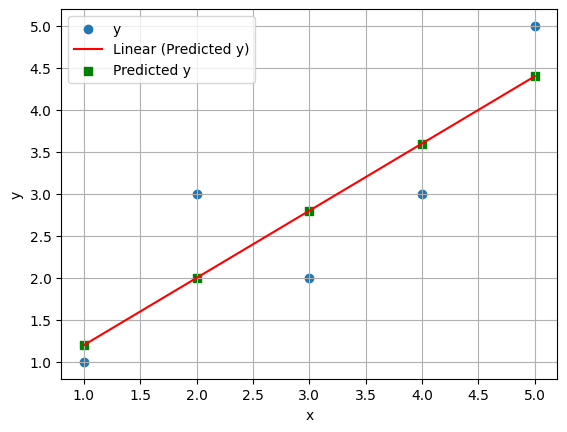

In [11]:
plt.scatter(x, y, label='y')
plt.plot(x_line, y_line, color='red', label='Linear (Predicted y)')
plt.scatter(x, predictions, marker='s', color='green',label='Predicted y' )
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Estimating Error


We can calculate an error score for our predictions called the Root Mean Squared Error or
RMSE:

$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$

In [12]:
rmse = np.sqrt(np.mean((y - predictions)**2))
print(rmse)

0.692820323027551


Each prediction is on average wrong by about 0.692 units.


# Shortcut

Quick Shortcut: For simple linear regression, there's a shortcut to estimate $\beta_1, the slope.

Shortcut Formula:

$\beta_1 = \rho(x,y) * (\frac{\sigma(y)}{\sigma(x)})$

*  $\rho(x,y)$: or corr(x, y) (aka pearson correlation coeff) is the correlation between x and y, indicating how related they are in the range of -1 to 1.

*  $\sigma$: or stdev() is the standard deviation, showing how spread out the data is from the mean.

In [13]:
correlation = np.corrcoef(x, y)[0, 1]
print(correlation)
std_y= np.std(y, ddof=1)
std_x= np.std(x, ddof=1)

beta_1 = correlation * (std_y / std_x)

print(beta_1)

0.8528028654224418
0.7999999999999999


The issue is that np.std() by default calculates the population standard deviation. To get the sample standard deviation, you need to set the ddof parameter to 1.

The difference lies in how the standard deviation is calculated:

Default (ddof=0): This calculates the population standard deviation. It assumes that your data represents the entire population. The formula divides the sum of squared differences by the number of data points (N).

ddof=1: This calculates the sample standard deviation. It assumes your data is a sample from a larger population. The formula divides the sum of squared differences by the number of data points minus 1 (N-1). This is known as Bessel's correction and provides an unbiased estimate of the population standard deviation.